<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/ARIMA_%2B_SVR_%2B_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [0]:
uploaded = files.upload()   

Saving airlines2.txt to airlines2 (1).txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))

In [0]:
uploaded = files.upload()

Saving airlines2_ARIMA.txt to airlines2_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['airlines2_ARIMA.txt']))

In [0]:
uploaded = files.upload()

Saving airlines2_r.txt to airlines2_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['airlines2_r.txt']))

In [0]:
import io
import pandas as pd

# Un-comment the line for the data base that
# you want to predict


#data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))
#data_ARIMA = pd.read_csv(io.BytesIO(uploaded['airlines2_ARIMA.txt']))
#data_r = pd.read_csv(io.BytesIO(uploaded['airlines2_r.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['airlines2_ARIMA.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['DadosONS.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['carsales.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['coloradoRiver.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['accidentalDeathUSA.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['electric.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['gas.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['lakeerie.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['milk.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['redwine.txt']))

In [0]:
data_r.describe()

,Residuo
count,144.000000
mean,2.832599
std,29.757948
min,-86.729834
25%,-15.400285
50%,0.233500
75%,24.658117
max,81.595276


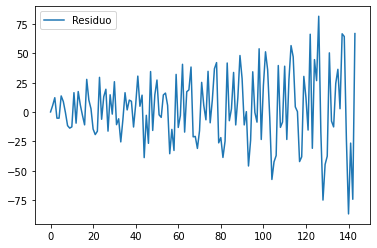

In [0]:
data_r.plot()

In [0]:
len(data)

144

In [0]:
#Scaling the data
from sklearn import preprocessing

#min_max_scaler = preprocessing.MinMaxScaler()

#data_r_n = min_max_scaler.fit_transform(data_r)

#data_n = data.copy()
#data_n = (data - data.min())/(data.max() - data.min())
#data_ARIMA_n = (data_ARIMA - data_ARIMA.min())/(data_ARIMA.max() - data_ARIMA.min())

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [0]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

      Residuo   Residuo   Residuo  ...   Residuo   Residuo   Residuo
0    0.515917       NaN       NaN  ...       NaN       NaN       NaN
1    0.548651  0.515917       NaN  ...       NaN       NaN       NaN
2    0.587900  0.548651  0.515917  ...       NaN       NaN       NaN
3    0.484460  0.587900  0.548651  ...       NaN       NaN       NaN
4    0.484363  0.484460  0.587900  ...       NaN       NaN       NaN
..        ...       ...       ...  ...       ...       ...       ...
139  0.376937  0.897451  0.911189  ...  0.250371  0.070000  0.413713
140  0.000000  0.376937  0.897451  ...  0.292054  0.250371  0.070000
141  0.358242  0.000000  0.376937  ...  0.814766  0.292054  0.250371
142  0.073976  0.358242  0.000000  ...  0.469495  0.814766  0.292054
143  0.912230  0.073976  0.358242  ...  0.440188  0.469495  0.814766

[144 rows x 13 columns]


In [0]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.41, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


27
28
77


In [0]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

          ARIMA       ARIMA       ARIMA  ...       ARIMA       ARIMA       ARIMA
0    111.888000         NaN         NaN  ...         NaN         NaN         NaN
1    112.378158  111.888000         NaN  ...         NaN         NaN         NaN
2    119.771433  112.378158  111.888000  ...         NaN         NaN         NaN
3    134.183102  119.771433  112.378158  ...         NaN         NaN         NaN
4    126.199377  134.183102  119.771433  ...         NaN         NaN         NaN
..          ...         ...         ...  ...         ...         ...         ...
139  629.281833  557.666302  468.353843  ...  451.586191  537.947070  576.091574
140  594.729834  629.281833  557.666302  ...  399.569768  451.586191  537.947070
141  487.428775  594.729834  629.281833  ...  354.584335  399.569768  451.586191
142  464.277816  487.428775  594.729834  ...  424.702000  354.584335  399.569768
143  365.178562  464.277816  487.428775  ...  403.635172  424.702000  354.584335

[144 rows x 13 columns]


In [0]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.41, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.5, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

27
28
77


In [0]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

       X      X      X      X      X  ...      X      X      X      X      X
0    112    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
1    118  112.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
2    132  118.0  112.0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3    129  132.0  118.0  112.0    NaN  ...    NaN    NaN    NaN    NaN    NaN
4    121  129.0  132.0  118.0  112.0  ...    NaN    NaN    NaN    NaN    NaN
..   ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
139  606  622.0  535.0  472.0  461.0  ...  405.0  362.0  407.0  463.0  559.0
140  508  606.0  622.0  535.0  472.0  ...  417.0  405.0  362.0  407.0  463.0
141  461  508.0  606.0  622.0  535.0  ...  391.0  417.0  405.0  362.0  407.0
142  390  461.0  508.0  606.0  622.0  ...  419.0  391.0  417.0  405.0  362.0
143  432  390.0  461.0  508.0  606.0  ...  461.0  419.0  391.0  417.0  405.0

[144 rows x 13 columns]


In [0]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.41, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.5, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

27
28
77


In [0]:
def pso(n_particles, iterations, dimensions, inertia):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    
    # Initializing particles' positions randomly, inside
    # the search space
    x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
    y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
    z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

    c = np.concatenate((x,y,z), axis=1)

    # Initializing particles' parameters
    v = np.zeros((n_particles, dimensions))
    c1 = 2
    c2 = 2
    p_best = np.zeros((n_particles, dimensions))
    p_best_val = np.zeros(n_particles) + sys.maxsize  
    g_best = np.zeros(dimensions)
    g_best_val = sys.maxsize

    best_iter = np.zeros(iterations)

    # Initializing regression variables
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    

    # Displaying tridimensional search space
    plot(c)

    from sklearn.metrics import mean_squared_error
    
    for i in range(iterations):

        for j in range(n_particles):
          # Starting Regression
          rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

          # Fitting the curve
          rgs.fit(X_train, y_train)
          y_predict = rgs.predict(X_val)

          # Using Mean Squared Error to verify prediction accuracy
          mse = mean_squared_error(y_val, y_predict) 

          # If mse value for that search point, for that particle,
          # is less than its personal best point,
          # replace personal best
          if(mse < p_best_val[j]):   
              # The value below represents the current least Mean Squared Error
              p_best_val[j] = mse
              
              # The value below represents the current least Regressor
              p_best_RGS[j] = rgs
                           

              # The value below represents the current search coordinates for
              # the particle's current least Mean Squared Error found
              p_best[j] = c[j].copy()
              
          # Using auxiliar variable to get the index of the
          # particle that found the configuration with the 
          # minimum MSE value
          aux = np.argmin(p_best_val)        
        
          if(p_best_val[aux] < g_best_val):
              # Assigning Particle's current best MSE to the Group's best    
              g_best_val = p_best_val[aux]

              # Assigning Particle's current best configuration to the Group's best
              g_best = p_best[aux].copy()

              # Group best regressor:
              # the combination of C, Epsilon and Gamma
              # that computes the best fitting curve
              g_best_RGS = p_best_RGS[aux]

        
          rand1 = np.random.random()
          rand2 = np.random.random()

          # The variable below influences directly the particle's velocity.
          # It can either make it smaller or bigger. 
          w = inertia

          # The equation below represents Particle's velocity, which is
          # the rate of change in its position
          v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

          # Change in the Particle's position 
          c[j] = c[j] + v[j]

          # Below is a series of conditions that stop the particles from
          # leaving the search space
          if(c[j][2] < min_g):
            c[j][2] = min_g
          if(c[j][2] > max_g):
            c[j][2] = max_g
          if(c[j][1] < min_e):
            c[j][1] = min_e
          if(c[j][1] > max_e):
            c[j][1] = max_e
          if(c[j][0] < min_c):
            c[j][0] = min_c
          if(c[j][0] > max_c):
            c[j][0] = max_c
            
     
        # The variable below represents the least Mean Squared Error
        # of the current iteration
        best_iter[i] = g_best_val
                
        print('Best value iteration # %d = %f\n'%(i, g_best_val))

    # Coordinates found after all the iterations
    print('Group Best configuration found: ')
    print(g_best)
    print('\n')
    print('Best Regressor:\n')
    print(g_best_RGS)
    print('\n')
    
    # Displaying the MSE value variation throughout the iterations
    t = range(iterations)
    plt.plot(t, best_iter, label='Fitness Value')
    plt.legend()
    plt.show()

    # Displaying Particles' final configuration
    plot(c)

    # Making the prediction with the best configuration of C, Epsilon and
    # Gamma found by the particles
    predict_test = g_best_RGS.predict(X_test)

    
    # Displaying actual values and predicted values for
    # Group's best configuration found overall
    print(color.BOLD + 'Predictions with the Population Best Value found:\n' + color.END)

    evaluate(predict_test)  


    # Evaluating the perfomance of the residue predictions + ARIMA predictions when 
    # compared to the ARIMA predictions by itself
    print(color.BOLD + 'Results after combining the residual prediction with the ARIMA prediction:\n' + color.END)
    
    residual_performance(predict_test, y_test_ARIMA, y_test_raw)

    #return predict_test
      


In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
  ax = Axes3D(plt.figure())
  ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'r')
  ax.set_xlabel('$C$', fontsize = 20)
  ax.set_ylabel('$\epsilon$', fontsize = 25)
  ax.zaxis.set_rotate_label(False) 
  ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
  ax.zaxis._axinfo['label']['space_factor'] = 1.0
  plt.show()

  print('\n')
  print('\n')

In [0]:
def evaluate(predictions):

    from sklearn.metrics import mean_squared_error 
    import statistics as st

    predict_test = predictions


    plt.plot(range(len(y_test)), y_test, label='Real')
    plt.plot(range(len(predict_test)), predict_test, label='Predicted')
    plt.legend()
    plt.show()
    
    mse = mean_squared_error(y_test, predict_test)
    print('\n')
    print('\n')
    print('Mean Squared Error for the Test Set:\t %f' %mse)
    print('\n')
    print('\n')
    print('Predictions Average:\t %f' %((predict_test.sum()/len(predict_test))))
    print('\n')
    print('\n')
    print('Predictions Median:\t %f' %(st.median(predict_test)))
    print('\n')
    print('\n')

In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    #data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())
    #data = datan*(max(data)-min(data)) + min(data)

    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)


    print('\nMean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse1)

    print('\nEnsemble Model series` predicitions:\n')

    plt.plot(range(len(data)), data, label='Real')
    plt.plot(range(len(final_predictions)), final_predictions, label='Predicted')
    plt.legend()
    plt.show()

        
    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse2)

    print('\nARIMA Model series` predicitions:\n')

    plt.plot(range(len(data)), data, label='Real')
    plt.plot(range(len(ARIMA)), ARIMA, label='Predicted')
    plt.legend()
    plt.show()



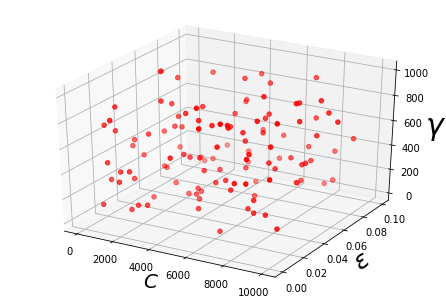





Best value iteration # 0 = 0.022125

Best value iteration # 1 = 0.009018

Best value iteration # 2 = 0.008871

Best value iteration # 3 = 0.008827

Best value iteration # 4 = 0.008818

Best value iteration # 5 = 0.008771

Best value iteration # 6 = 0.008771

Best value iteration # 7 = 0.008552

Best value iteration # 8 = 0.008354

Best value iteration # 9 = 0.008348

Best value iteration # 10 = 0.008348

Best value iteration # 11 = 0.008348

Best value iteration # 12 = 0.008348

Best value iteration # 13 = 0.008348

Best value iteration # 14 = 0.008348

Best value iteration # 15 = 0.008348

Best value iteration # 16 = 0.008348

Best value iteration # 17 = 0.008348

Best value iteration # 18 = 0.008329

Best value iteration # 19 = 0.008329

Best value iteration # 20 = 0.008329

Best value iteration # 21 = 0.008329

Best value iteration # 22 = 0.008329

Best value iteration # 23 = 0.008329

Best value iteration # 24 = 0.008329

Best value iteration # 25 = 0.008329

Best value iterati

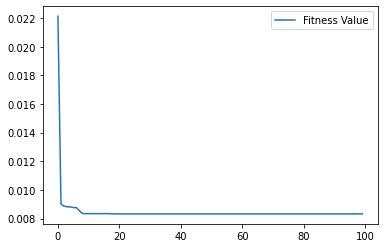

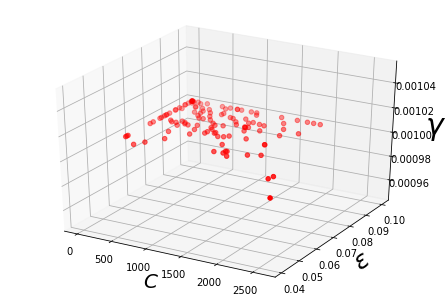





Predictions with the Population Best Value found:



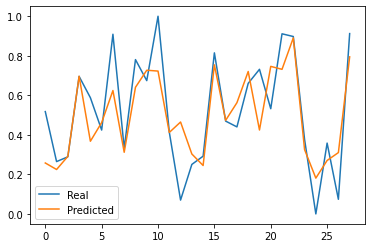





Mean Squared Error for the Test Set:	 0.027450




Predictions Average:	 0.497733




Predictions Median:	 0.463494




Results after combining the residual prediction with the ARIMA prediction:


Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 777.744972

Ensemble Model series` predicitions:



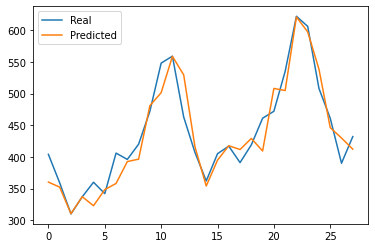


Mean Squared Error for the ARIMA Model:	 2163.507388

ARIMA Model series` predicitions:



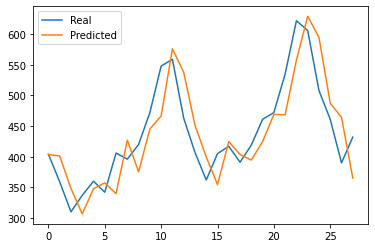

In [0]:
pso(120, 100, 3, 1)

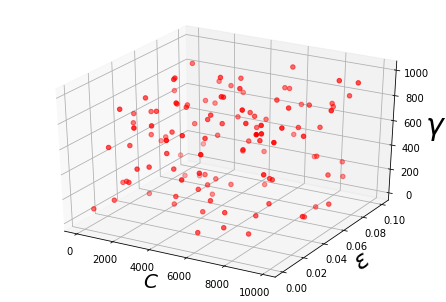





Best value iteration # 0 = 0.021444

Best value iteration # 1 = 0.009096

Best value iteration # 2 = 0.009021

Best value iteration # 3 = 0.009021

Best value iteration # 4 = 0.009021

Best value iteration # 5 = 0.009021

Best value iteration # 6 = 0.009021

Best value iteration # 7 = 0.009021

Best value iteration # 8 = 0.008987

Best value iteration # 9 = 0.008987

Best value iteration # 10 = 0.008987

Best value iteration # 11 = 0.008750

Best value iteration # 12 = 0.008750

Best value iteration # 13 = 0.008750

Best value iteration # 14 = 0.008485

Best value iteration # 15 = 0.008485

Best value iteration # 16 = 0.008485

Best value iteration # 17 = 0.008485

Best value iteration # 18 = 0.008479

Best value iteration # 19 = 0.008461

Best value iteration # 20 = 0.008461

Best value iteration # 21 = 0.008461

Best value iteration # 22 = 0.008461

Best value iteration # 23 = 0.008461

Best value iteration # 24 = 0.008461

Best value iteration # 25 = 0.008461

Best value iterati

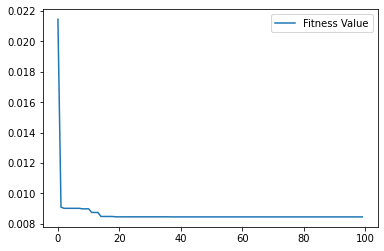

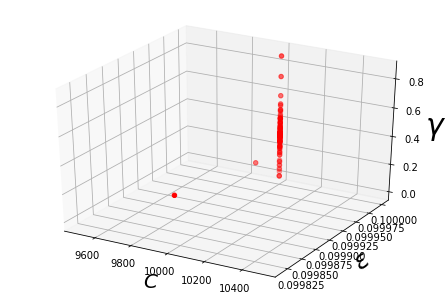





Predictions with the Population Best Value found:



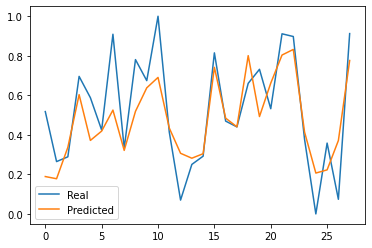





Mean Squared Error for the Test Set:	 0.029569




Predictions Average:	 0.477389




Predictions Median:	 0.437465




Results after combining the residual prediction with the ARIMA prediction:


Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 837.797585

Ensemble Model series` predicitions:



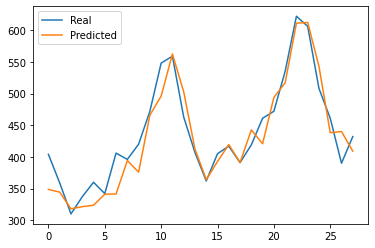


Mean Squared Error for the ARIMA Model:	 2163.507388

ARIMA Model series` predicitions:



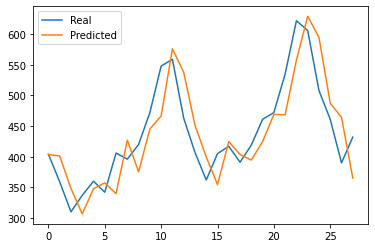

In [0]:
pso(120, 100, 3, 0.8)

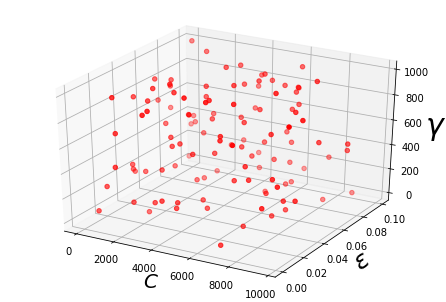





Best value iteration # 0 = 0.024908

Best value iteration # 1 = 0.009023

Best value iteration # 2 = 0.008917

Best value iteration # 3 = 0.008585

Best value iteration # 4 = 0.008585

Best value iteration # 5 = 0.008399

Best value iteration # 6 = 0.008348

Best value iteration # 7 = 0.008348

Best value iteration # 8 = 0.008348

Best value iteration # 9 = 0.008348

Best value iteration # 10 = 0.008332

Best value iteration # 11 = 0.008332

Best value iteration # 12 = 0.008332

Best value iteration # 13 = 0.008332

Best value iteration # 14 = 0.008332

Best value iteration # 15 = 0.008332

Best value iteration # 16 = 0.008332

Best value iteration # 17 = 0.008332

Best value iteration # 18 = 0.008332

Best value iteration # 19 = 0.008332

Best value iteration # 20 = 0.008332

Best value iteration # 21 = 0.008332

Best value iteration # 22 = 0.008332

Best value iteration # 23 = 0.008332

Best value iteration # 24 = 0.008332

Best value iteration # 25 = 0.008330

Best value iterati

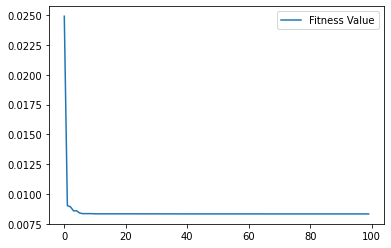

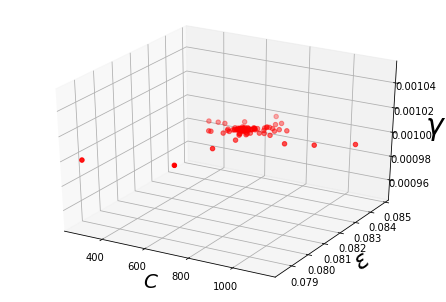





Predictions with the Population Best Value found:



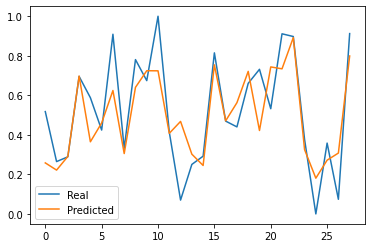





Mean Squared Error for the Test Set:	 0.027445




Predictions Average:	 0.497133




Predictions Median:	 0.464072




Results after combining the residual prediction with the ARIMA prediction:


Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 777.608356

Ensemble Model series` predicitions:



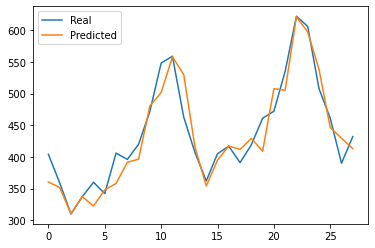


Mean Squared Error for the ARIMA Model:	 2163.507388

ARIMA Model series` predicitions:



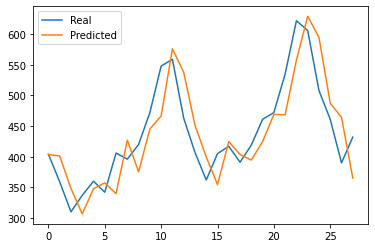

In [0]:
pso(120, 100, 3, 0.6)

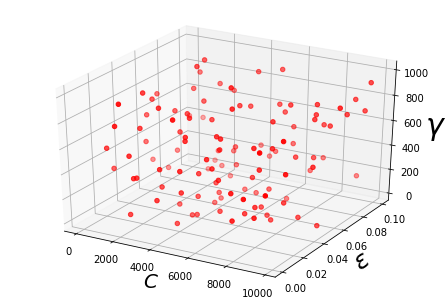





Best value iteration # 0 = 0.027708

Best value iteration # 1 = 0.008596

Best value iteration # 2 = 0.008506

Best value iteration # 3 = 0.008426

Best value iteration # 4 = 0.008336

Best value iteration # 5 = 0.008336

Best value iteration # 6 = 0.008333

Best value iteration # 7 = 0.008329

Best value iteration # 8 = 0.008329

Best value iteration # 9 = 0.008328

Best value iteration # 10 = 0.008328

Best value iteration # 11 = 0.008328

Best value iteration # 12 = 0.008328

Best value iteration # 13 = 0.008328

Best value iteration # 14 = 0.008328

Best value iteration # 15 = 0.008323

Best value iteration # 16 = 0.008323

Best value iteration # 17 = 0.008323

Best value iteration # 18 = 0.008323

Best value iteration # 19 = 0.008323

Best value iteration # 20 = 0.008323

Best value iteration # 21 = 0.008323

Best value iteration # 22 = 0.008323

Best value iteration # 23 = 0.008323

Best value iteration # 24 = 0.008323

Best value iteration # 25 = 0.008323

Best value iterati

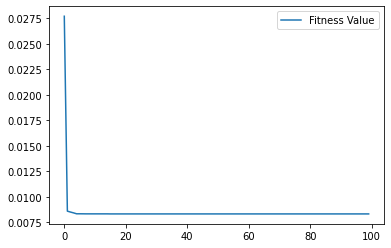

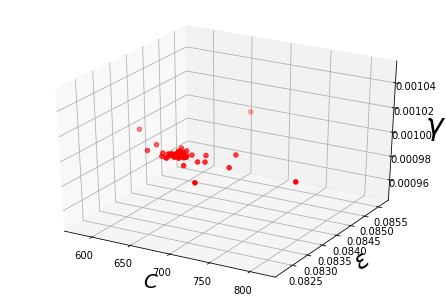





Predictions with the Population Best Value found:



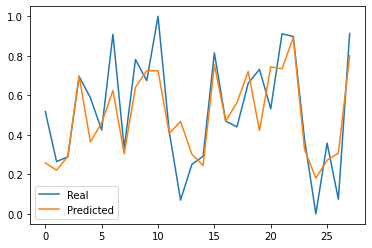





Mean Squared Error for the Test Set:	 0.027451




Predictions Average:	 0.497120




Predictions Median:	 0.464019




Results after combining the residual prediction with the ARIMA prediction:


Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 777.771286

Ensemble Model series` predicitions:



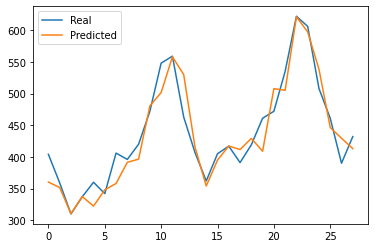


Mean Squared Error for the ARIMA Model:	 2163.507388

ARIMA Model series` predicitions:



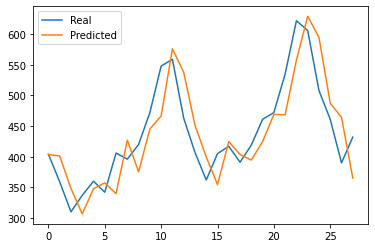

In [0]:
pso(120, 100, 3, 0.2)